<a href="https://colab.research.google.com/github/momomendoza2476-max/SIMULACI-N-II/blob/main/TAREA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [4]:
def g(x):
    return np.sqrt(np.arctan(x))

####Método Monte Carlo Crudo

In [14]:
def mc_crudo(N):
    G = []
    for i in range(N):
        u = rd.random()
        G.append(g(u))
    G = np.array(G)
    return np.mean(G), np.var(G), np.std(G), G

####Método Monte Carlo Acierto y Error

In [15]:
def mc_acierto_error(N, repeticiones=200):
    aciertos = []
    for j in range(repeticiones):
        hits = 0
        for i in range(N):
            x = rd.random()
            y = rd.random()
            if y <= g(x):
                hits += 1
        I = hits/N   # estimación para esta repetición
        aciertos.append(I)

    aciertos = np.array(aciertos)
    return np.mean(aciertos), np.var(aciertos), np.std(aciertos), aciertos


In [16]:
N = 1000

In [8]:
media_crudo, var_crudo, std_crudo, datos_crudo = mc_crudo(N)
media_ae, var_ae, std_ae, datos_ae = mc_acierto_error(N, repeticiones=500)

In [17]:
print("==== Monte Carlo Crudo ====")
print("Estimación:", media_crudo)
print("Varianza:", var_crudo)
print("Desviación estándar:", std_crudo)

print("\n==== Monte Carlo Acierto-Error ====")
print("Estimación:", media_ae)
print("Varianza:", var_ae)
print("Desviación estándar:", std_ae)

==== Monte Carlo Crudo ====
Estimación: 0.6337544429390323
Varianza: 0.041223746506577036
Desviación estándar: 0.20303631819597456

==== Monte Carlo Acierto-Error ====
Estimación: 0.6311559999999999
Varianza: 0.00024568766400000046
Desviación estándar: 0.015674427070869305


In [10]:
#EFICIENCIA
#(fórmula típica: E = 1 / (N * Varianza))


E_crudo = 1 / (N * var_crudo)
E_ae = 1 / (N * var_ae)

print("\nEficiencia MC Crudo:", E_crudo)
print("Eficiencia MC Acierto-Error:", E_ae)


Eficiencia MC Crudo: 0.0242578631187841
Eficiencia MC Acierto-Error: 4.070208425279334


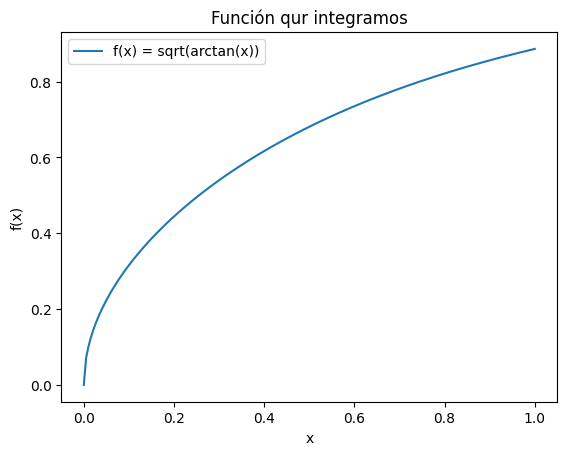

In [18]:
X = np.linspace(0,1,200)
plt.plot(X, g(X), label="f(x) = sqrt(arctan(x))")
plt.title("Función qur integramos")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

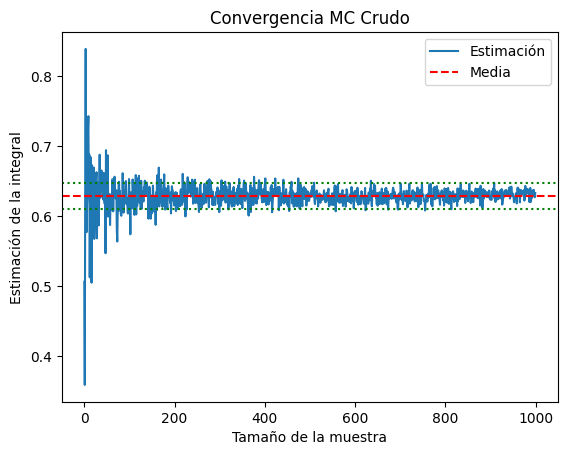

In [12]:
promedios_crudo = []
for n in range(1, N+1):
    m,_,_,_ = mc_crudo(n)
    promedios_crudo.append(m)

promedios_crudo = np.array(promedios_crudo)
m_crudo = np.mean(promedios_crudo)
sigma_crudo = np.std(promedios_crudo)

plt.plot(promedios_crudo, label="Estimación")
plt.axhline(m_crudo, color="red", linestyle="--", label="Media")
plt.axhline(m_crudo+sigma_crudo, color="green", linestyle=":")
plt.axhline(m_crudo-sigma_crudo, color="green", linestyle=":")
plt.title("Convergencia MC Crudo")
plt.xlabel("Tamaño de la muestra")
plt.ylabel("Estimación de la integral")
plt.legend()
plt.show()

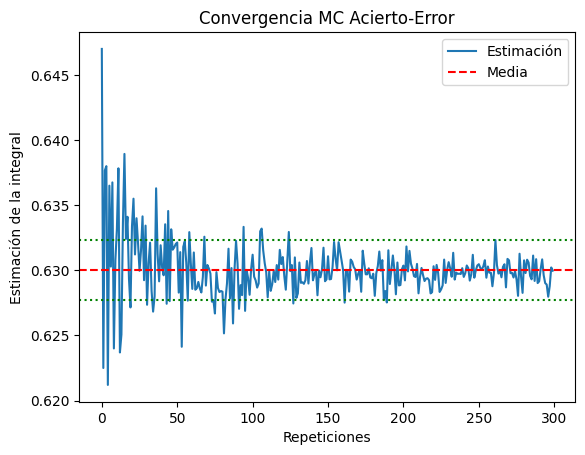

In [13]:
promedios_ae = []
reps = 300
for r in range(1, reps+1):
    m,_,_,_ = mc_acierto_error(N, repeticiones=r)
    promedios_ae.append(m)

promedios_ae = np.array(promedios_ae)
m_ae = np.mean(promedios_ae)
sigma_ae = np.std(promedios_ae)

plt.plot(promedios_ae, label="Estimación")
plt.axhline(m_ae, color="red", linestyle="--", label="Media")
plt.axhline(m_ae+sigma_ae, color="green", linestyle=":")
plt.axhline(m_ae-sigma_ae, color="green", linestyle=":")
plt.title("Convergencia MC Acierto-Error")
plt.xlabel("Repeticiones")
plt.ylabel("Estimación de la integral")
plt.legend()
plt.show()